In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re

In [179]:
input_file = "test_output.txt"

heatmap = np.zeros(shape=(10,10))  # initializing the matrix

with open(input_file,"r") as file:
    lines = file.read()
    
    regex_heatmap = re.compile("heat-map \(x (\d)\) \(y (\d)\) \(h (\d+)\)")
    regex_action = re.compile("\(action (.+)\) \(x (\d)\) \(y (\d)\)")
    regex_k_cell = re.compile("k-cell \(x (\d)\) \(y (\d)\) \(content (.+)\)\)")
    
    coordinates = re.findall(regex_heatmap, lines)
    actions = re.findall(regex_action, lines)
    k_cells = re.findall(regex_k_cell, lines)
    
    #print(actions)  # DEBUG
    #print(k_cells)  # DEBUG
    
    for c in coordinates:
        x = int(c[0])
        y = int(c[1])
        value = int(c[2])
        
        heatmap[x,y] = value
            
    # Getting the cordinates of the cells containing 100
    cells_100 = np.where(heatmap == 100)
    # putting them all to 0
    heatmap[cells_100] = 0
    # putting them all to max value + 1
    heatmap[cells_100] = np.max(heatmap) + 1
    
    #print(heatmap)  # DEBUG

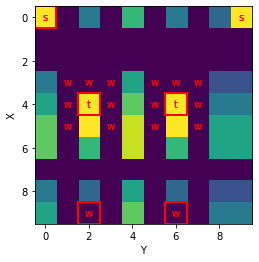

In [181]:
def highlight_cell(y, x, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect


def annotate_cell(text, x, y):
    # TODO: controllare qui https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
    t = ""
    if text == "water":
        t = "w"
    elif text == "sub":
        t = "s"
    else:
        t = "t"
    plt.text(x, y, t, ha="center", va="center", color="r")


def annotate_heatmap():
    for c in actions:
        x = int(c[1])
        y = int(c[2])
        if c[0] == "fire":
            highlight_cell(x,y, color="red", linewidth=2)
    
    for c2 in k_cells:
        x = int(c2[0])
        y = int(c2[1])
        content = c2[2]
        annotate_cell(content, y, x)


plt.imshow(heatmap)
plt.xlabel("Y")
plt.ylabel("X")
annotate_heatmap()
plt.show()